# Chronic Kidney Disease
Data has 25 feattures which may predict a patient with chronic kidney disease

In [ ]:
# pip install -U scikit-learn


![](https://i.pinimg.com/564x/d8/ad/c5/d8adc5543f0f47ebb4e7da821f428937.jpg)

## Index

1. Data Description
2. Used Python Libraries
3. Know Dataset Nature
4. Exploratory data analysis (EDA)
5. Data Preprocessing
6. Data Normalization
7. Feature Selection
8. Feature engineering
9. Model Buliding
10. Receiver Operating Characteristic Curve (ROC AUC)
11. conclusion

## Data Description:

We use the following representation to collect the dataset

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - hemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. class - class

## Used Python Libraries

In [1]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



## Know Dataset Nature

In [103]:
data = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')

In [104]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [105]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [107]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Exploratory data analysis (EDA)

1) For numeric data

       Made histograms to understand distributions
       Corrplot
       Pivot table comparing survival rate across numeric variables
2) For Categorical Data

       Made bar charts to understand balance of classes
       Made pivot tables to understand relationship with survival

In [108]:
data_num = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']]
data_cat = data[['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

In [109]:
filna = data[['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']]


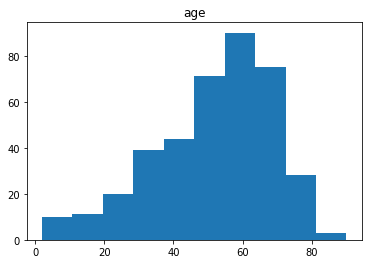

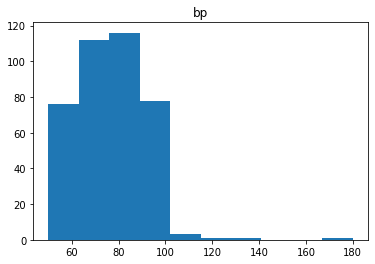

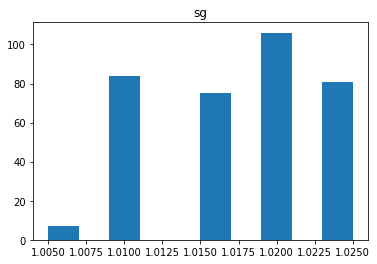

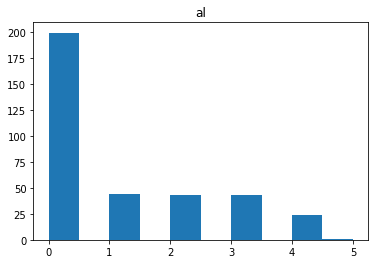

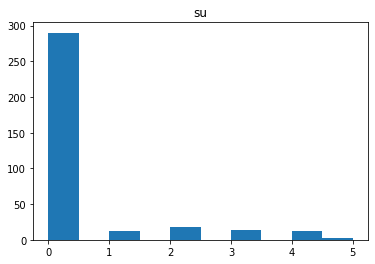

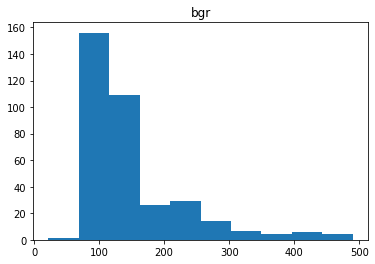

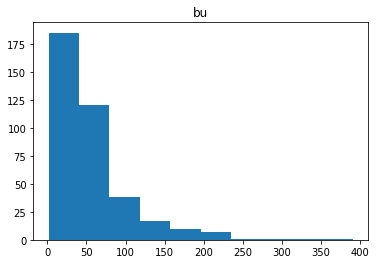

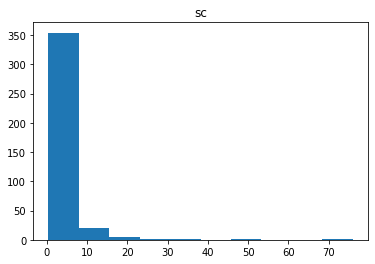

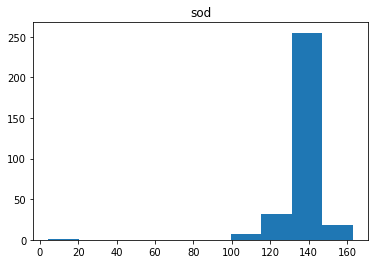

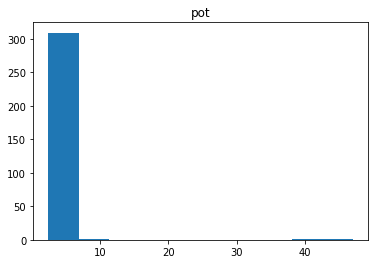

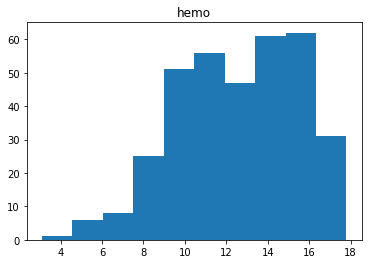

In [110]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

           age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992  0.196985   
bp    0.159480  1.000000 -0.218836  0.160689  0.222576  0.160193  0.188517   
sg   -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.374710 -0.314295   
al    0.122091  0.160689 -0.469760  1.000000  0.269305  0.379464  0.453528   
su    0.220866  0.222576 -0.296234  0.269305  1.000000  0.717827  0.168583   
bgr   0.244992  0.160193 -0.374710  0.379464  0.717827  1.000000  0.143322   
bu    0.196985  0.188517 -0.314295  0.453528  0.168583  0.143322  1.000000   
sc    0.132531  0.146222 -0.361473  0.399198  0.223244  0.114875  0.586368   
sod  -0.100046 -0.116422  0.412190 -0.459896 -0.131776 -0.267848 -0.323054   
pot   0.058377  0.075151 -0.072787  0.129038  0.219450  0.066966  0.357049   
hemo -0.192928 -0.306540  0.602582 -0.634632 -0.224775 -0.306189 -0.610360   

            sc       sod       pot      hemo  
age   0.132531 -

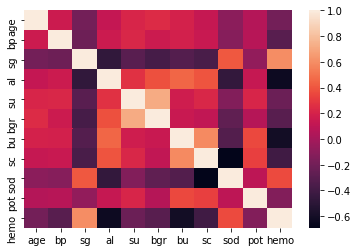

In [111]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [112]:
pd.pivot_table(data, index='classification', values=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo'])

,age,al,bgr,bp,bu,hemo,pot,sc,sg,sod,su
classification,,,,,,,,,,,
ckd,54.425000,1.721154,175.523810,79.705882,72.656170,10.652217,4.883030,4.430720,1.013937,133.882530,0.770732
ckd\t,68.500000,2.000000,164.500000,70.000000,41.000000,9.700000,4.500000,2.550000,1.010000,135.500000,0.000000
notckd,46.516779,0.000000,107.722222,71.351351,32.798611,15.188194,4.337931,0.868966,1.022414,141.731034,0.000000


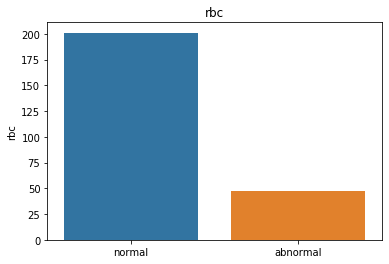

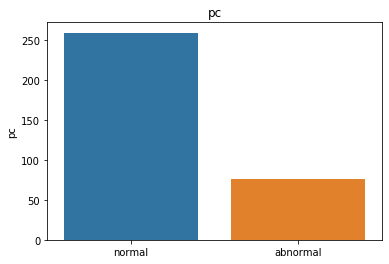

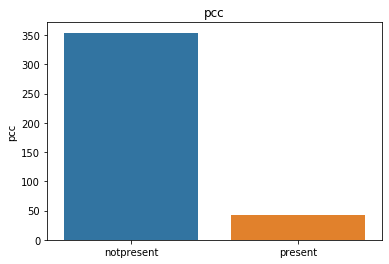

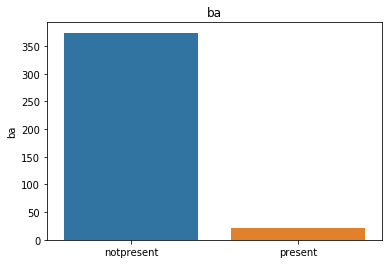

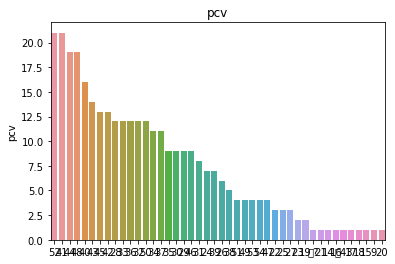

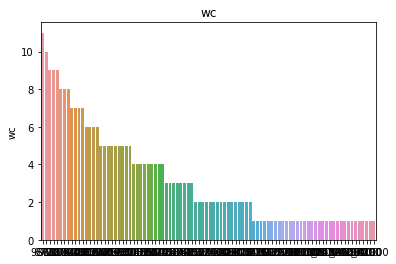

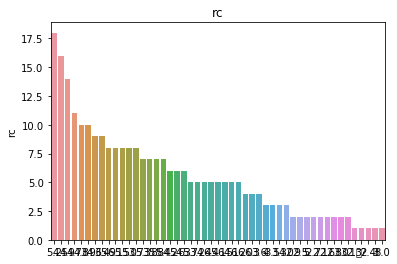

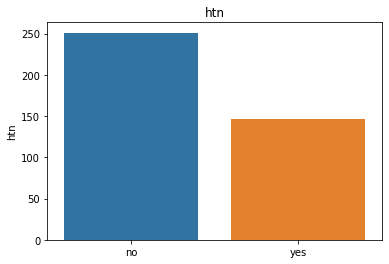

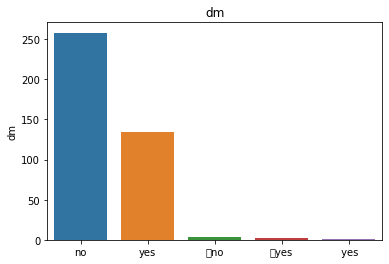

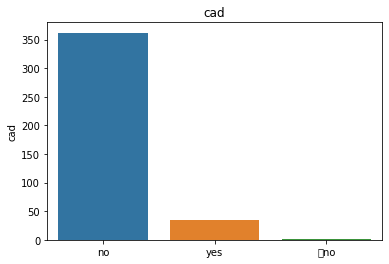

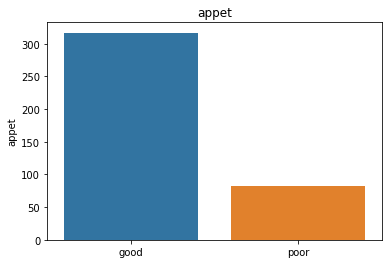

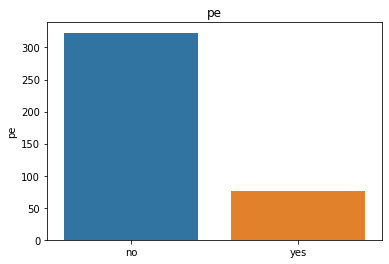

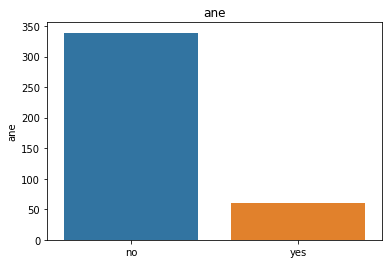

In [113]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

In [114]:
data_cat = data[['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

In [115]:
print(data.classification.value_counts())
data.classification.replace("ckd\t","ckd",inplace=True)
print(data.classification.value_counts())
print("==="*20)
print(data.dm.value_counts())
data.dm.replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)
print(data.dm.value_counts())
print("==="*20)
print(data.cad.value_counts())
data.cad.replace(["\tno"],["no"],inplace=True)
print(data.cad.value_counts())

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64
ckd       250
notckd    150
Name: classification, dtype: int64
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
no     261
yes    137
Name: dm, dtype: int64
no      362
yes      34
\tno      2
Name: cad, dtype: int64
no     364
yes     34
Name: cad, dtype: int64


In [116]:
for i in data_cat:
    print(pd.pivot_table(data,index='classification',columns=i, values='age'))
    print("=="*20)

rbc              abnormal     normal
classification                      
ckd             52.068182  54.610169
notckd                NaN  46.056738
pc               abnormal     normal
classification                      
ckd             55.148649  52.373913
notckd                NaN  46.056738
pcc             notpresent    present
classification                       
ckd              53.530000  59.357143
notckd           46.682759        NaN
ba              notpresent    present
classification                       
ckd              54.540909  54.545455
notckd           46.682759        NaN
pcv             \t43   \t?    15    16    17    18    19    20    21  \
classification                                                         
ckd             68.0  67.0  32.0  68.0  50.0  50.0  57.5  59.0  64.0   
notckd           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

pcv                    22  ...    46    47    48     49         50    51  \
classification             ...     

## Data Preprocessing
1. deal with unwanted text.
2. deal with missing values
3. histogram
4. heatmap
5. pivot_table

In [117]:
data.rc.replace("\t?",data.rc.mode()[0], inplace=True)
data.rc = data.rc.apply(lambda x: float(x))

data.wc.replace("\t?",data.wc.mode()[0], inplace=True)
data.wc = data.wc.apply(lambda x: float(x))


data.pcv.replace(["\t?","\t43"],data.pcv.mode()[0], inplace=True)
data.pcv = data.pcv.apply(lambda x: float(x))

data.classification.replace(["ckd","notckd"],[1,0], inplace=True)

In [118]:
data_final_num = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
data_fincal_cat = data[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']]

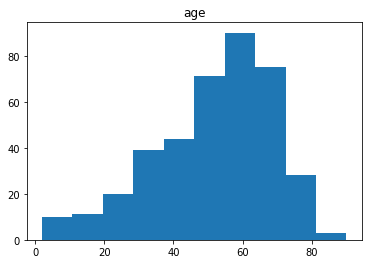

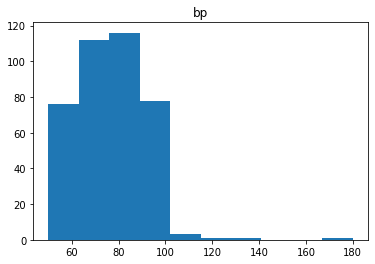

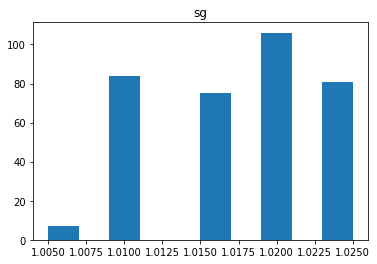

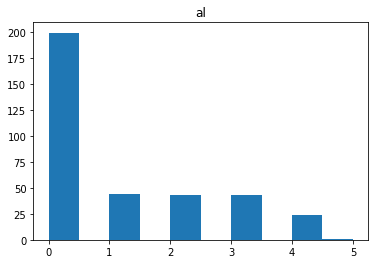

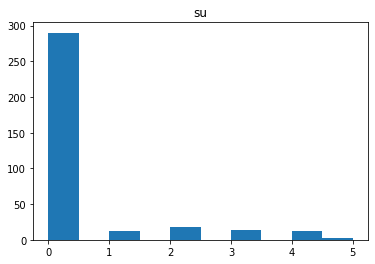

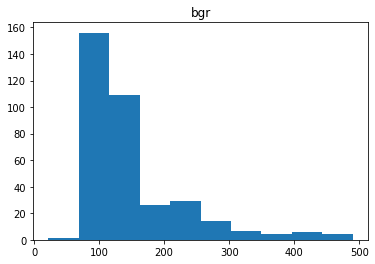

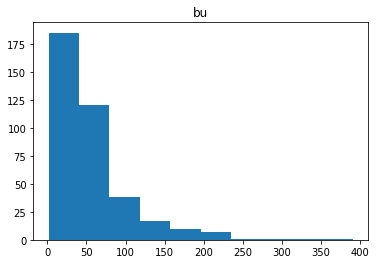

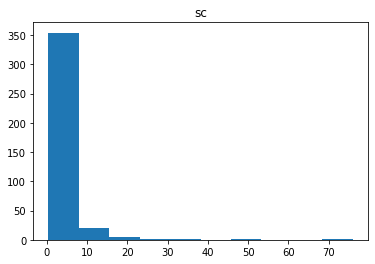

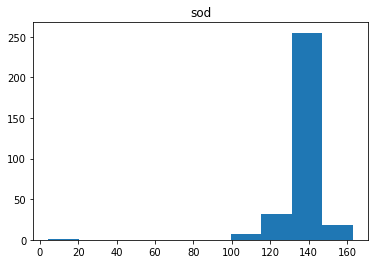

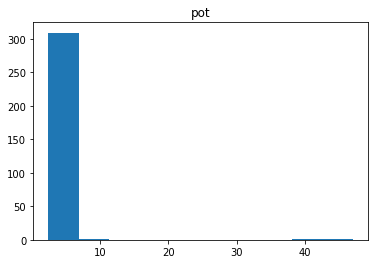

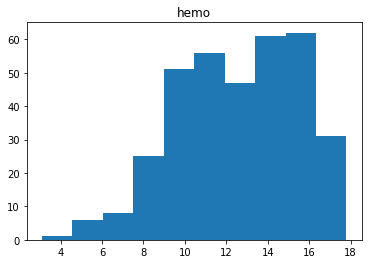

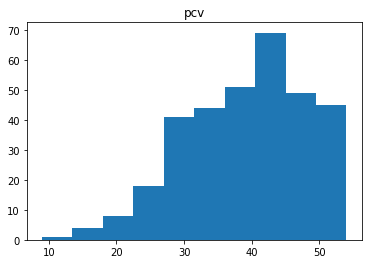

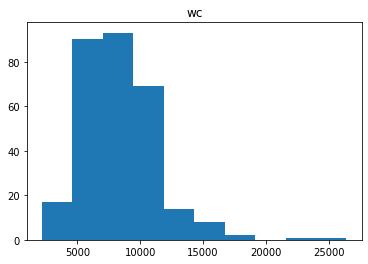

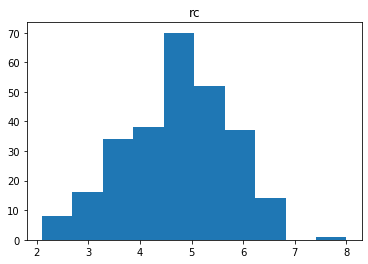

In [119]:
for i in data_final_num.columns:
    plt.hist(data_final_num[i])
    plt.title(i)
    plt.show()

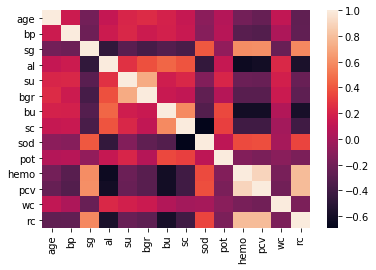

In [120]:
sns.heatmap(data_final_num.corr())

In [121]:
pd.pivot_table(data, index='classification', values=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'])

,age,al,bgr,bp,bu,hemo,pcv,pot,rc,sc,sg,sod,su,wc
classification,,,,,,,,,,,,,,
0,46.516779,0.000000,107.722222,71.351351,32.798611,15.188194,46.335616,4.337931,5.379021,0.868966,1.022414,141.731034,0.00000,7705.594406
1,54.541322,1.722488,175.419811,79.625000,72.389030,10.647549,32.972826,4.878443,3.955118,4.414916,1.013918,133.901786,0.76699,9074.342105


In [122]:
for i in data_fincal_cat:
    print(pd.pivot_table(data,index='classification',columns=i, values='age'))
    print("=="*20)

rbc              abnormal     normal
classification                      
0                     NaN  46.056738
1               52.068182  54.610169
pc               abnormal     normal
classification                      
0                     NaN  46.056738
1               55.148649  52.373913
pcc             notpresent    present
classification                       
0                46.682759        NaN
1                53.530000  59.357143
ba              notpresent    present
classification                       
0                46.682759        NaN
1                54.540909  54.545455
htn                    no        yes
classification                      
0               46.408163        NaN
1               46.020000  60.542254
dm                     no        yes
classification                      
0               46.408163        NaN
1               47.541284  60.278195
cad                    no        yes
classification                      
0               46.408163     

In [123]:
# dealing with missing values
for i in filna.columns:
    if data[i].isna().sum() > 0 :
        if data[i].dtype == 'float64':
            data[i].fillna(data[i].median(), inplace=True)
        else:
            data[i].fillna(data[i].mode()[0], inplace=True)


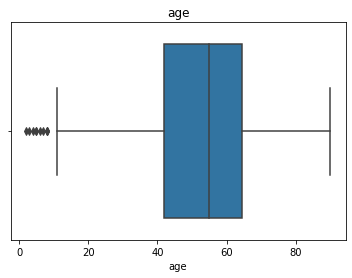

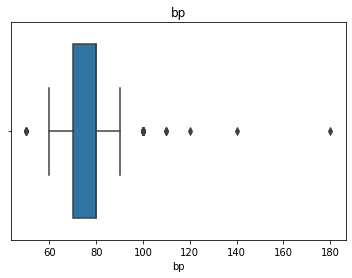

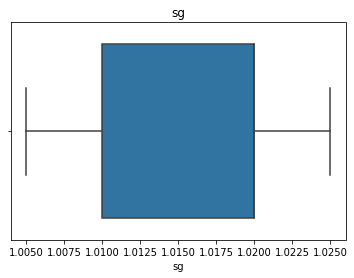

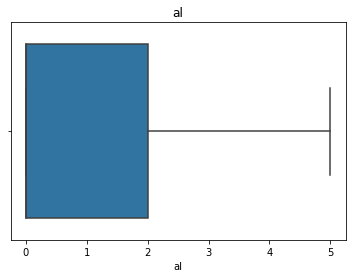

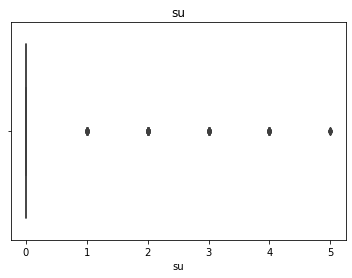

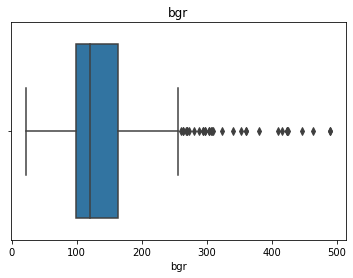

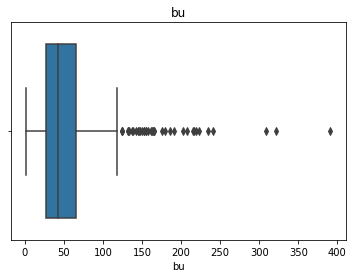

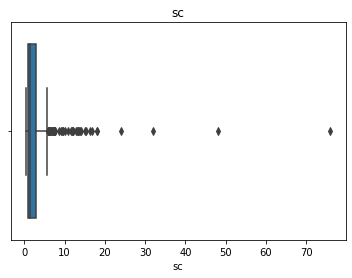

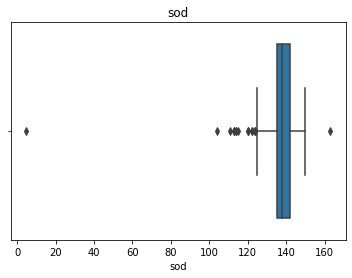

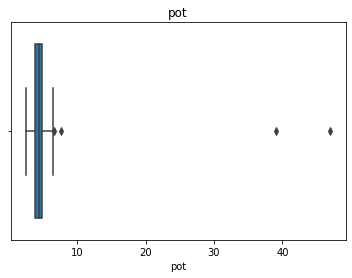

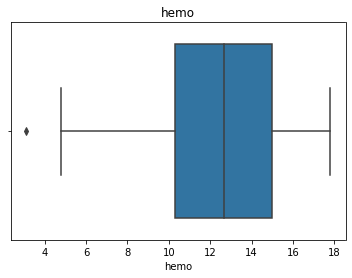

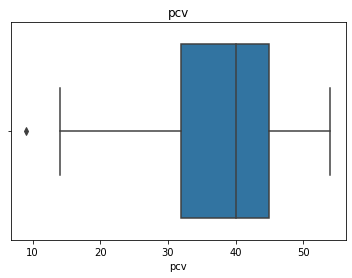

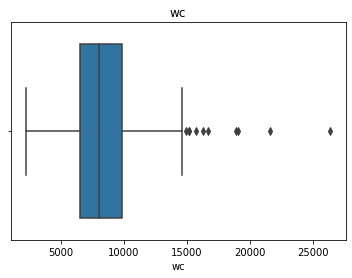

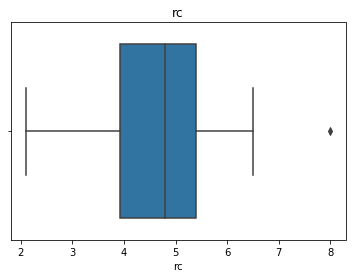

In [124]:
# dealing with outliers values
for i in data_final_num.columns:
    sns.boxplot(data_final_num[i])
    plt.title(i)
    plt.show()


## Data Normalization

1. percentile(interquartile range)
2. boxplot     

In [125]:
def outlinefree(dataCol):    
    sorted(dataCol)
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1   
    LowerRange = Q1-(1.5 * IQR)   
    UpperRange = Q3+(1.5 * IQR)   
    return LowerRange,UpperRange

In [126]:
Lowage,Upage = outlinefree(data.age)
Lowbp,Upbp = outlinefree(data.bp)
Lowsg,Upsg = outlinefree(data.sg)
Lowal,Upal = outlinefree(data.al)
Lowsu,Upsu = outlinefree(data.su)
Lowbgr,Upbgr = outlinefree(data.bgr)
Lowbu,Upbu = outlinefree(data.bu)
Lowsc,Upsc = outlinefree(data.sc)
Lowsod,Upsod = outlinefree(data.sod)
Lowpot,Uppot = outlinefree(data.pot)
Lowhemo,Uphemo = outlinefree(data.hemo)
Lowpcv,Uppcv = outlinefree(data.pcv)
Lowwc,Upwc = outlinefree(data.wc)
Lowrc,Uprc = outlinefree(data.rc)

In [127]:
data.age.replace(list(data[(data.age < Lowage)].age),Lowage , inplace=True)
data.age.replace(list(data[(data.age > Upage)].age),Upage , inplace=True)

data.bp.replace(list(data[(data.bp < Lowbp)].bp),Lowbp , inplace=True)
data.bp.replace(list(data[(data.bp > Upbp)].bp),Upbp , inplace=True)

data.sg.replace(list(data[(data.sg < Lowsg)].sg),Lowsg , inplace=True)
data.sg.replace(list(data[(data.sg > Upsg)].sg),Upsg , inplace=True)

data.al.replace(list(data[(data.al < Lowal)].al),Lowal , inplace=True)
data.al.replace(list(data[(data.al > Upal)].al),Upal , inplace=True)

data.su.replace(list(data[(data.su < Lowsu)].su),Lowsu , inplace=True)
data.su.replace(list(data[(data.su > Upsu)].su),Upsu , inplace=True)

data.bgr.replace(list(data[(data.bgr < Lowbgr)].bgr),Lowbgr , inplace=True)
data.bgr.replace(list(data[(data.bgr > Upbgr)].bgr),Upbgr , inplace=True)

data.bu.replace(list(data[(data.bu < Lowbu)].bu),Lowbu , inplace=True)
data.bu.replace(list(data[(data.bu > Upbu)].bu),Upbu , inplace=True)

data.sc.replace(list(data[(data.sc < Lowsc)].sc),Lowbu , inplace=True)
data.sc.replace(list(data[(data.sc > Upsc)].sc),Upbu , inplace=True)

data.sod.replace(list(data[(data.sod < Lowsod)].sod),Lowsod , inplace=True)
data.sod.replace(list(data[(data.sod > Upsod)].sod),Upsod , inplace=True)

data.pot.replace(list(data[(data.pot < Lowpot)].pot),Lowpot , inplace=True)
data.pot.replace(list(data[(data.pot > Uppot)].pot),Uppot , inplace=True)

data.hemo.replace(list(data[(data.hemo < Lowhemo)].hemo),Lowhemo , inplace=True)
data.hemo.replace(list(data[(data.hemo > Uphemo)].hemo),Uphemo , inplace=True)

data.pcv.replace(list(data[(data.pcv < Lowpcv)].pcv),Lowpcv , inplace=True)
data.pcv.replace(list(data[(data.pcv > Uppcv)].pcv),Uppcv , inplace=True)

data.wc.replace(list(data[(data.wc < Lowwc)].wc),Lowwc , inplace=True)
data.wc.replace(list(data[(data.wc > Upwc)].wc),Upwc , inplace=True)

data.rc.replace(list(data[(data.rc < Lowrc)].rc),Lowrc , inplace=True)
data.rc.replace(list(data[(data.rc > Uprc)].rc),Uprc , inplace=True)

In [128]:
data_final_num2 = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]

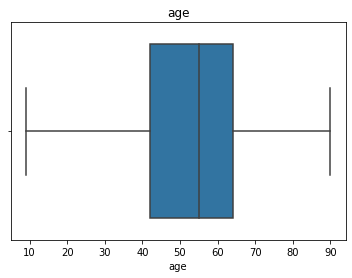

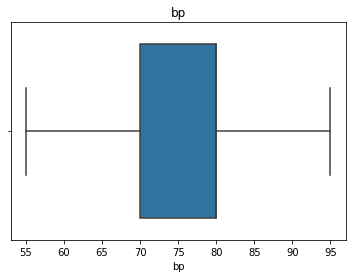

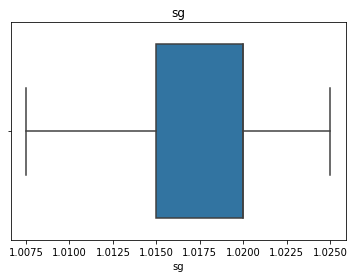

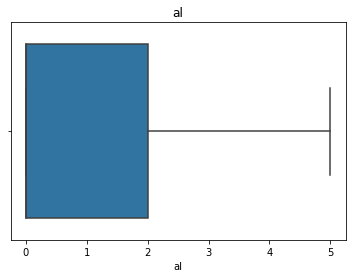

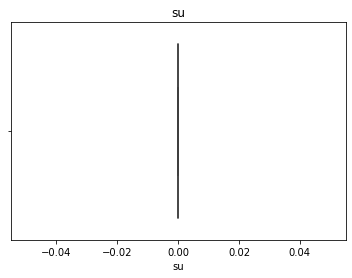

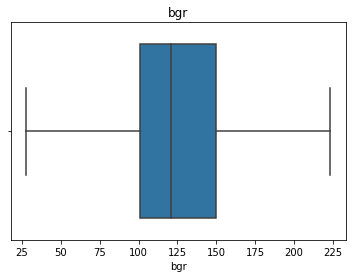

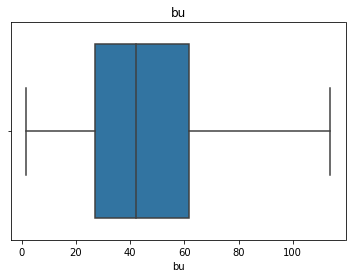

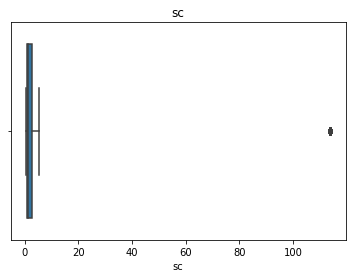

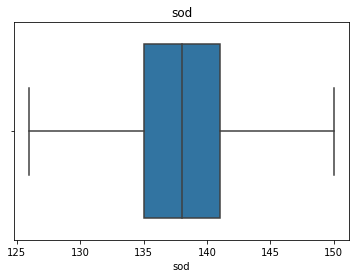

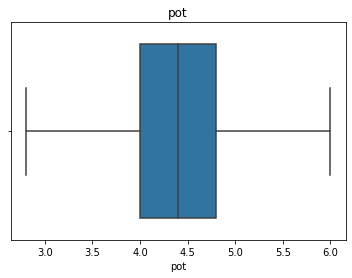

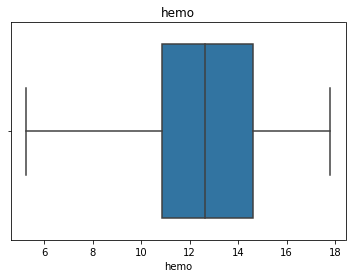

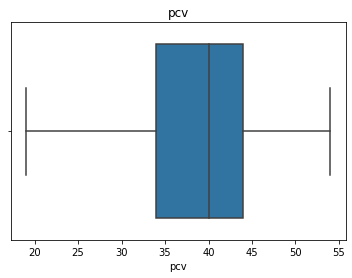

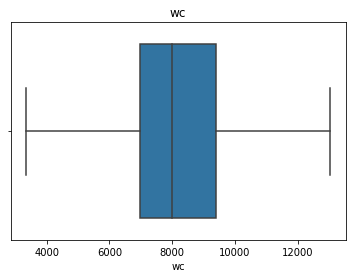

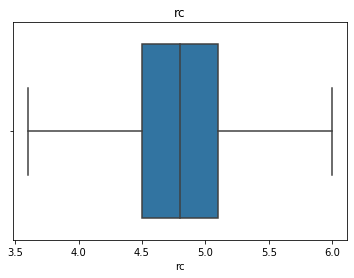

In [129]:
for i in data_final_num2.columns:
    sns.boxplot(data_final_num2[i])
    plt.title(i)
    plt.show()

## Feature Selection

1. seaborn.pairplot()

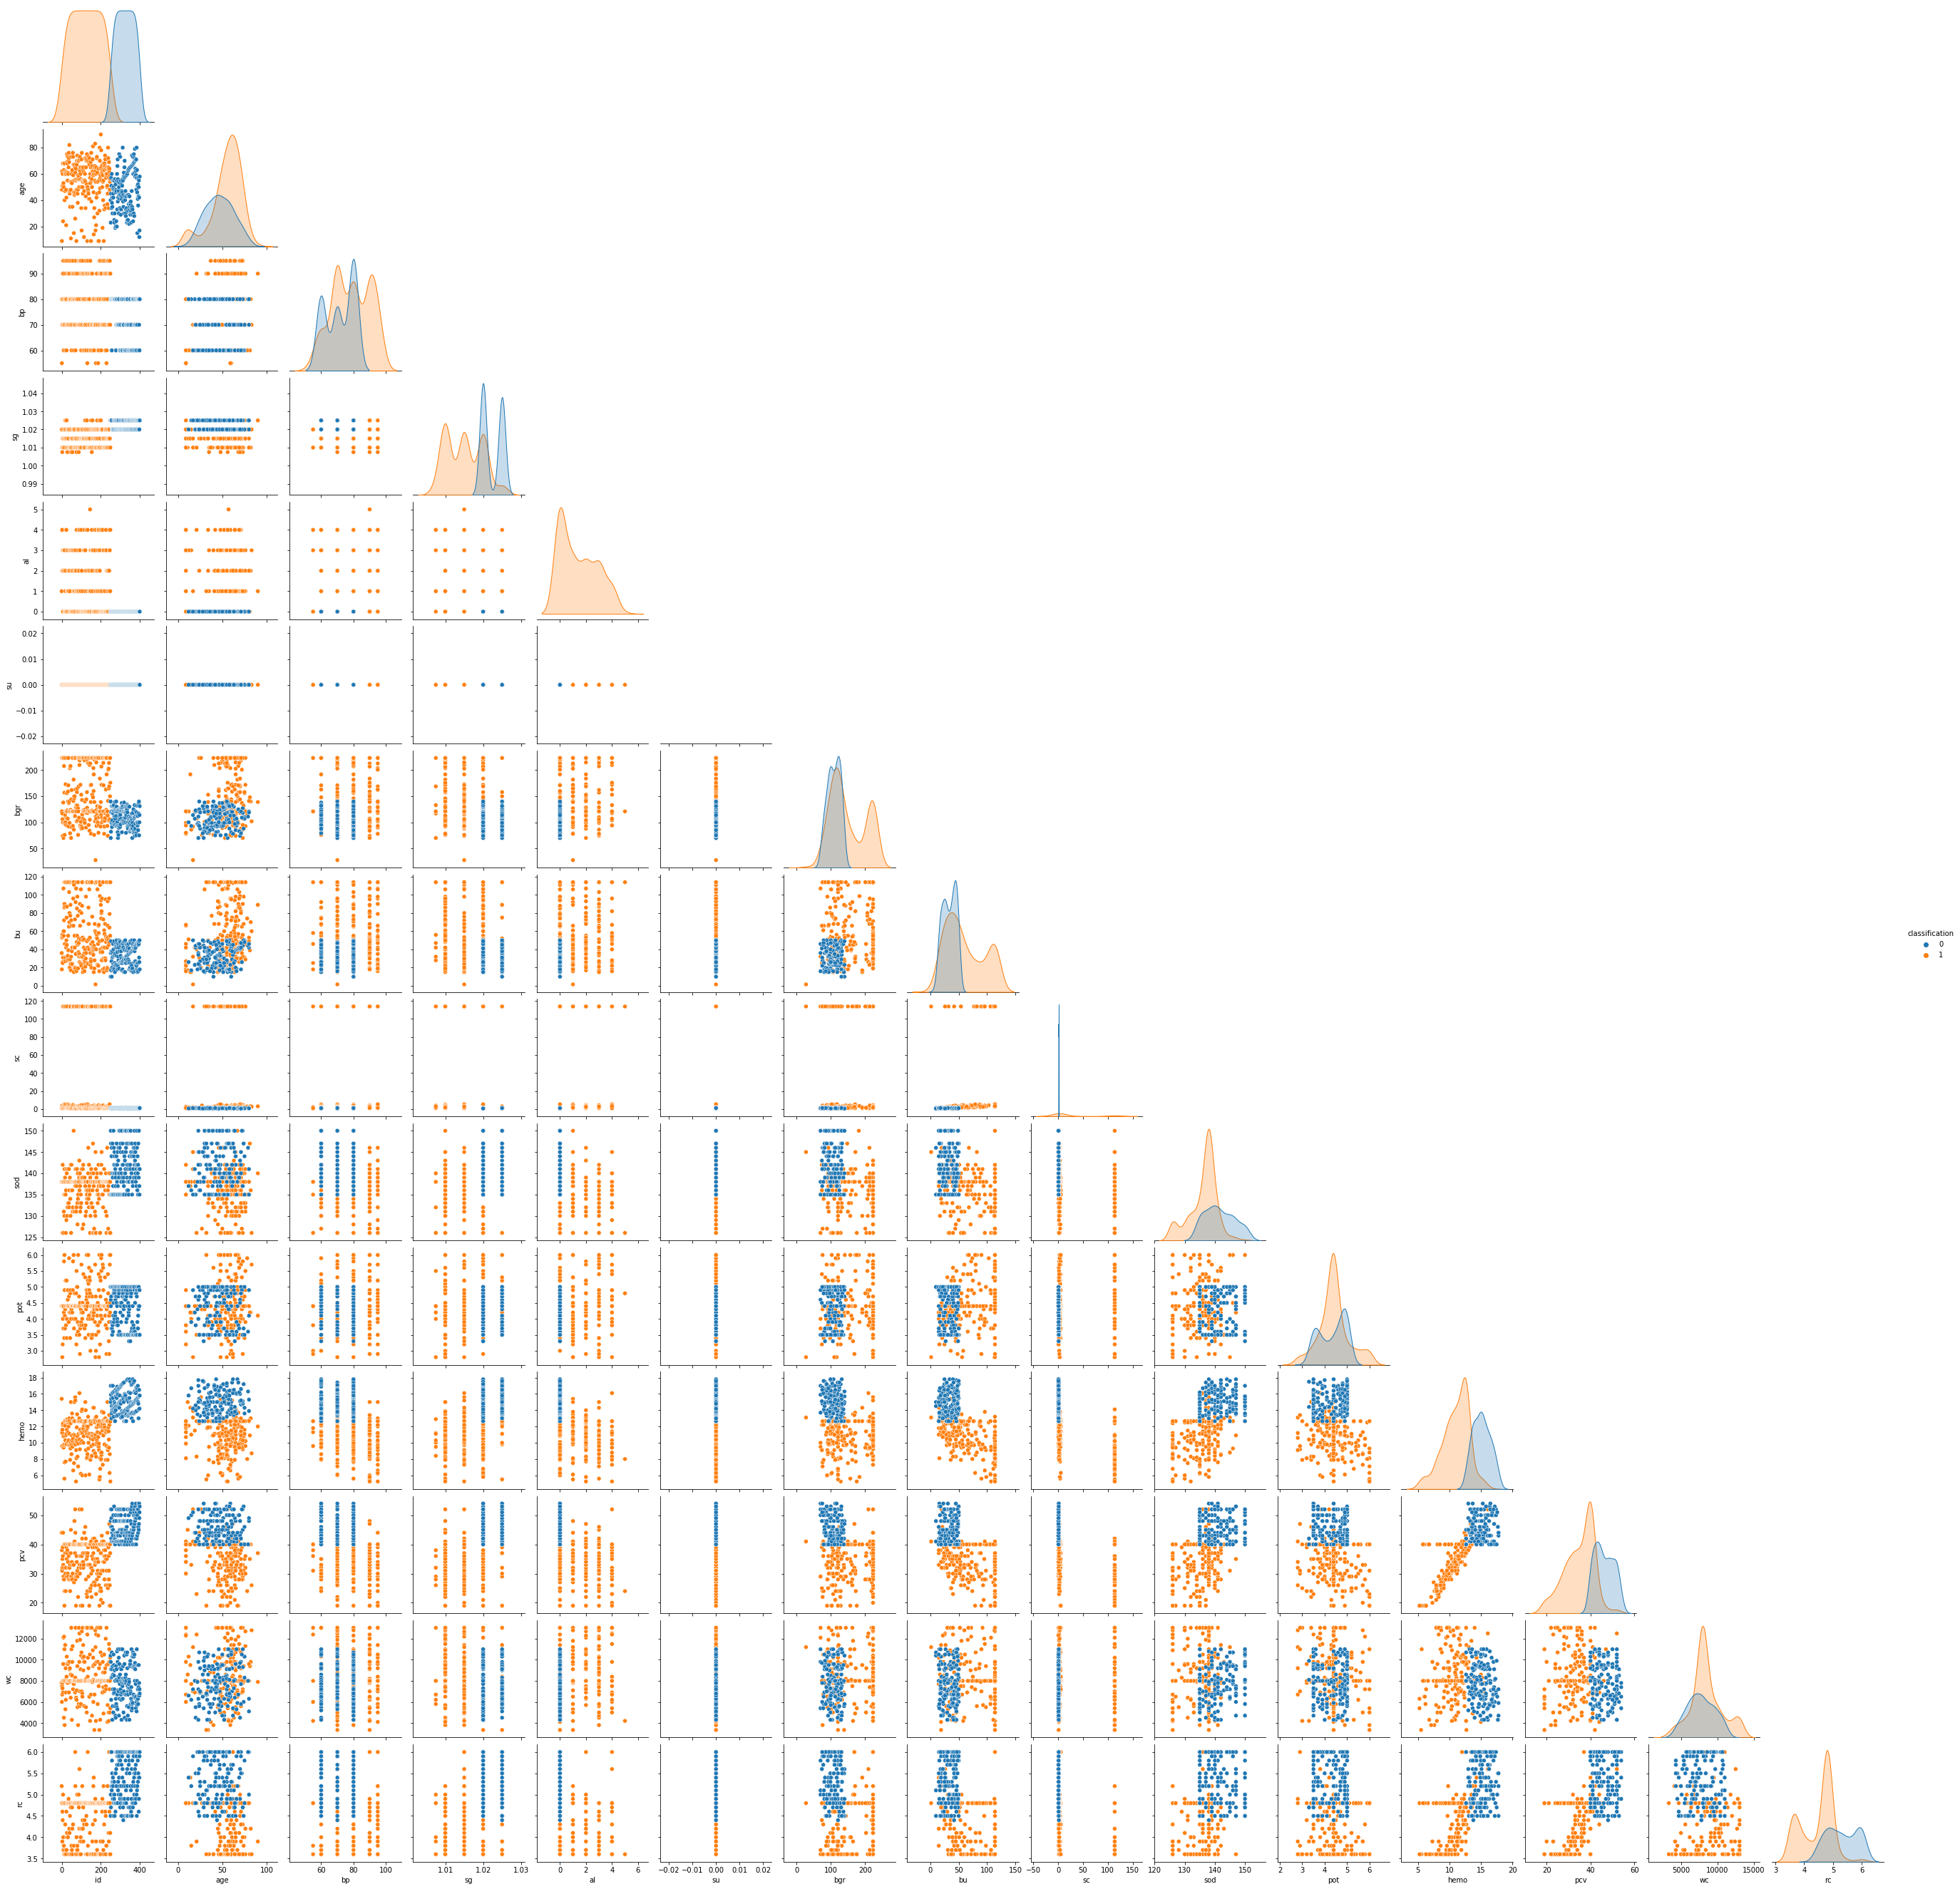

In [130]:
sns.pairplot(data, hue="classification",corner=True)

In [131]:
finaldata = data.loc[:,['classification','age','bp','sg','al','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

## Feature Engineering

1. get_dummies()

In [132]:
final_dataset = pd.get_dummies(finaldata)

In [133]:
features = final_dataset.iloc[:,1:].values
label = final_dataset.iloc[:,0].values

## Model Buliding
here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. Logistic Regression (f1 score: 0.9827586206896551 )
2. k-nearest neighbors (f1 score: 0.8571428571428571 )
3. **naive bayes (f1 score: 1.0)**
4. support vector classification (f1 score: 0.7730061349693252 )
5. **DecisionTreeClassifier (f1 score: 1.0)**
6. **RandomForestClassifier (f1 score: 1.0)**

In [134]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=112)

classimodel= LogisticRegression()  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  

y_pred =  classimodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.9827586206896551 

[[41  1]
 [ 1 57]]


In [53]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.9827586206896551 

 recall score:  0.9827586206896551 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        58

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [56]:
#------------------------k-nearest neighbors (K-nn)-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=43)

Knnmodel= KNeighborsClassifier()  
Knnmodel.fit(X_train, y_train)
trainscore =  Knnmodel.score(X_train,y_train)
testscore =  Knnmodel.score(X_test,y_test)  

y_pred =  Knnmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.8571428571428571 

[[36  4]
 [12 48]]


In [57]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.9230769230769231 

 recall score:  0.8 

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        40
           1       0.92      0.80      0.86        60

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



In [64]:
#------------------------naive bayes-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=82)

NBmodel=  GaussianNB()  
NBmodel.fit(X_train, y_train)
trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

y_pred =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  1.0 

[[37  0]
 [ 0 63]]


In [65]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [86]:
#------------------------support vector classification-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=187)

SVCmodel=  SVC(probability=True)  
SVCmodel.fit(X_train, y_train)
trainscore =  SVCmodel.score(X_train,y_train)
testscore =  SVCmodel.score(X_test,y_test)  

y_pred =  SVCmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.7730061349693252 

[[ 0 37]
 [ 0 63]]


In [69]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.63 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



In [71]:
#------------------------Decision Tree-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=78)

DTmodel=  DecisionTreeClassifier(max_depth=3)  
DTmodel.fit(X_train, y_train)
trainscore =  DTmodel.score(X_train,y_train)
testscore =  DTmodel.score(X_test,y_test)  

y_pred =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  1.0 

[[37  0]
 [ 0 63]]


In [72]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [80]:
#------------------------Random Forest-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=110)

RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=3) 
RFmodel.fit(X_train, y_train)
trainscore =  RFmodel.score(X_train,y_train)
testscore =  RFmodel.score(X_test,y_test)  

y_pred =  RFmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  1.0 

[[37  0]
 [ 0 63]]


In [81]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Receiver Operating Characteristic Curve (ROC AUC)

here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. Logistic Regression (auc: 0.9997333333333333)
2. k-nearest neighbors (auc: 0.8948933333333333)
3. **naive bayes (auc: 1.0)**
4. support vector classification (auc: 0.7623200000000001)
5. DecisionTreeClassifier (auc: 0.99892)
6. RandomForestClassifier (auc: 0.9998933333333333)

0.9997333333333333


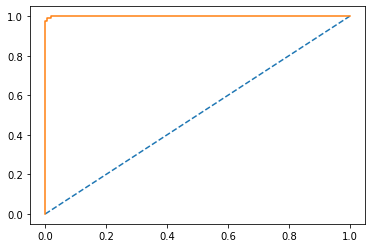

In [82]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = classimodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.8948933333333333


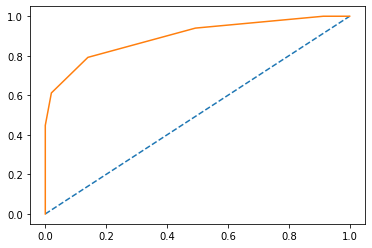

In [90]:
#------------------------k-nearest neighbors (K-nn)-----------------------
probabilityValues = Knnmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

1.0


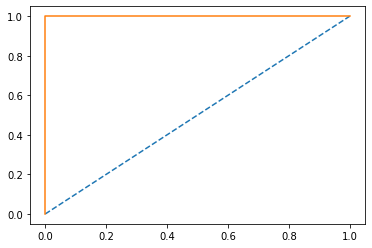

In [84]:
#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.7623200000000001


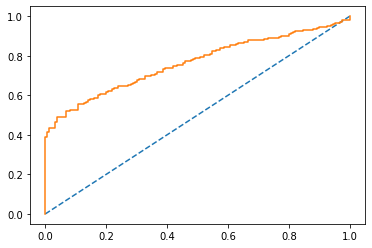

In [87]:
#-------------------------------------- support vector classification -------------------------------------
probabilityValues = SVCmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.99892


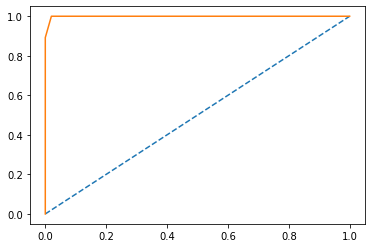

In [88]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.9998933333333333


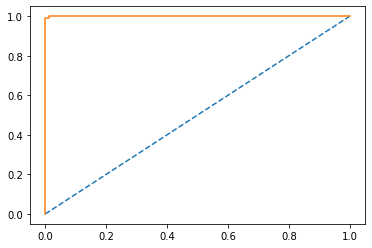

In [89]:
#-------------------------------------- Random Forest -------------------------------------
probabilityValues = RFmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

## Conclusion
I will choose a **naive bayes algorithm** for this dataset.

**naive bayes score**

1. **f1_score: 1.0**
2. **auc: 1.0**